<a href="https://colab.research.google.com/github/zoya-ivanova/-Data-Science/blob/main/%D0%9F%D0%BE%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Использование алгоритмов понижения размерности для улучшения классификации новостей (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html)

Цель: Исследовать влияние различных методов понижения размерности на качество классификации текстовых данных.

Применение к полученным векторам TF-IDF следующие методы понижения размерности:
   - PCA (Principal Component Analysis)
   - t-SNE (t-distributed Stochastic Neighbor Embedding)
   - UMAP (Uniform Manifold Approximation and Projection)


In [31]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans

In [32]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
categories = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.politics.mideast']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
y_train = newsgroups_train.target
import re
import nltk
from nltk.corpus import stopwords

In [33]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [34]:
# Создаем DataFrame
df = pd.DataFrame({
    'text': newsgroups_train.data,
    'target': y_train
})

df.head()

,text,target
0,How about transferring control to a non-profit...,2
1,\n\nDon't swallow propaganda as truth Sir. Bri...,3
2,\n\nMadmen are mad. Do we try to explain the ...,0
3,\n: >EVER HEAR OF\n: >BAPTISM AT BIRTH? If th...,0
4,"\n\n\n\n\nPerhaps not in Christianity, but in ...",0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2221 non-null   object
 1   target  2221 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.8+ KB


In [36]:
# Выводим количество уникальных значений target
df['target'].nunique()

4

In [37]:
df['target'].value_counts()

,count
target,
2,593
1,584
3,564
0,480


In [38]:
# Очистка текста
def clean_text(text):
    text = text.lower()  # Приведение к нижнему регистру
    text = re.sub(r'\d+', '', text)  # Удаление цифр
    text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
    text = re.sub(r'[^\w\s]', '', text)  # Удаление знаков препинания
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [39]:
# Удаление стоп-слов
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


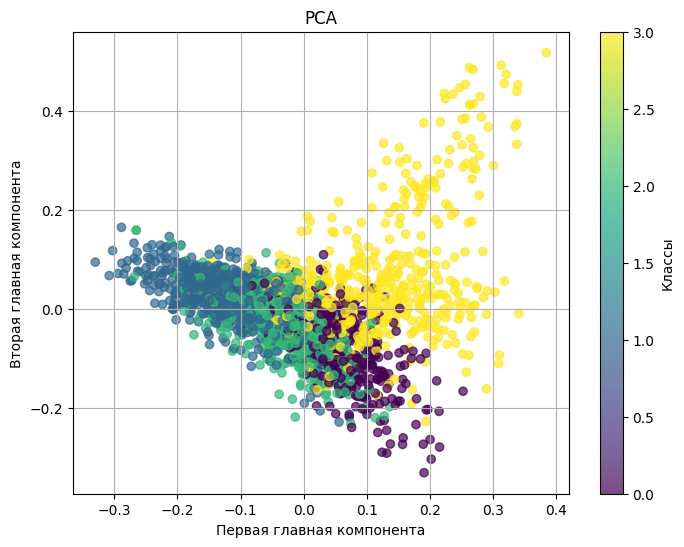

In [40]:
# Векторизация с использованием TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['clean_text']).toarray()

# Применение PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Визуализация результатов
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['target'], alpha=0.7, cmap='viridis')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('PCA')
plt.colorbar(scatter, label='Классы')
plt.grid(True)
plt.show()

In [41]:
# Вывод влияния признаков на компоненты

components = pca.components_
for i in range(components.shape[1]):
    comp1 = components[0, i]
    comp2 = components[1, i]
    print(f"Feature {i+1}: Первая компонента = {comp1:.4f}, Вторая компонента = {comp2:.4f}")

Feature 1: Первая компонента = -0.0068, Вторая компонента = -0.0059
Feature 2: Первая компонента = 0.0255, Вторая компонента = -0.0164
Feature 3: Первая компонента = -0.0193, Вторая компонента = 0.0001
Feature 4: Первая компонента = 0.0166, Вторая компонента = 0.0038
Feature 5: Первая компонента = 0.0072, Вторая компонента = 0.0036
Feature 6: Первая компонента = 0.0233, Вторая компонента = -0.0115
Feature 7: Первая компонента = 0.0208, Вторая компонента = -0.0082
Feature 8: Первая компонента = 0.0208, Вторая компонента = 0.0003
Feature 9: Первая компонента = 0.0063, Вторая компонента = 0.0071
Feature 10: Первая компонента = 0.0083, Вторая компонента = -0.0592
Feature 11: Первая компонента = -0.0005, Вторая компонента = -0.0033
Feature 12: Первая компонента = -0.0051, Вторая компонента = -0.0019
Feature 13: Первая компонента = 0.0036, Вторая компонента = 0.0009
Feature 14: Первая компонента = -0.0372, Вторая компонента = 0.0216
Feature 15: Первая компонента = -0.0880, Вторая компонента 

In [42]:
# Суммирование долей дисперсии для определения сохранённых данных
variance_retained = np.sum(pca.explained_variance_ratio_)
print(f"Сохранено {variance_retained*100:.2f}% данных после понижения размерности до 2 компонентов.")

Сохранено 2.34% данных после понижения размерности до 2 компонентов.


In [43]:
pca1 = PCA(n_components=5)
X_pca = pca1.fit_transform(X)

In [44]:
variance_retained = np.sum(pca1.explained_variance_ratio_)
print(f"Сохранено {variance_retained*100:.2f}% данных после понижения размерности до 5 компонент.")

Сохранено 4.95% данных после понижения размерности до 5 компонент.


Сохранено 2.34% данных после понижения размерности до 2 компонентов, означает, что два главных выбранных компонента, объясняют 2.34% общей дисперсии (вариативности) в исходных данных.

В контексте PCA (Principal Component Analysis), дисперсия показывает, сколько информации (или вариативности) из исходных данных сохраняется в новых компонентах. Чем больше дисперсии объясняют выбранные компоненты, тем лучше они представляют исходные данные, 2.34% — это довольно низкий показатель, что может указывать на то, что для более точного представления данных нужно использовать больше компонентов.

После увеличения компоненков до 5 компонентов - сохраняется 4.95%, уже лучше представляют представляют исходные данные, но все равно — это также довольно низкий показатель. Для более точного представления данных нужно использовать больше компонентов

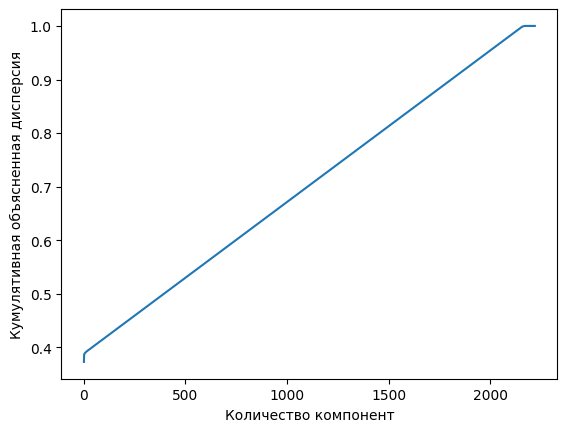

In [45]:
string_columns = df.select_dtypes(include=['object']).columns

df_encoded = pd.get_dummies(df, columns=string_columns)

pca = PCA().fit(df_encoded)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.show()

In [46]:
string_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=string_columns)

pca90 = PCA(n_components=30)
X_pca = pca90.fit_transform(df_encoded)

variance_retained = np.sum(pca90.explained_variance_ratio_)
print(f"Сохранено {variance_retained*100:.2f}% данных после понижения размерности до 30 компонентов.")

Сохранено 39.68% данных после понижения размерности до 30 компонентов.


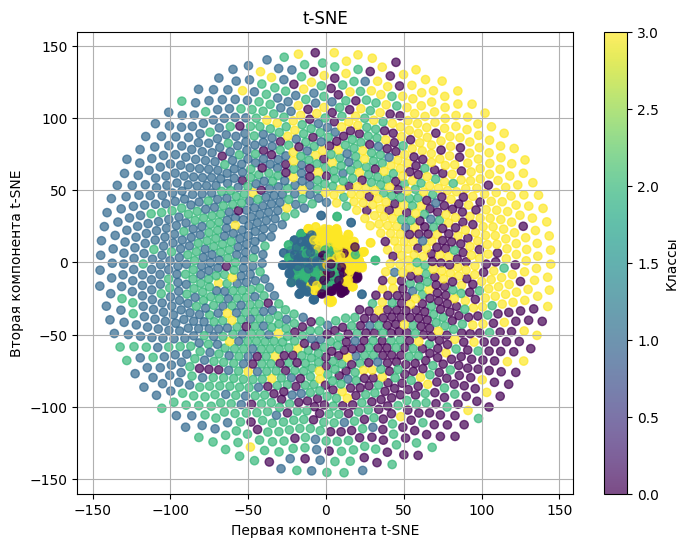

In [47]:
# Применение t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Визуализация результатов
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['target'], alpha=0.7, cmap='viridis')
plt.xlabel('Первая компонента t-SNE')
plt.ylabel('Вторая компонента t-SNE')
plt.title('t-SNE')
plt.colorbar(scatter, label='Классы')
plt.grid(True)
plt.show()

In [48]:
! pip install umap-learn
import umap

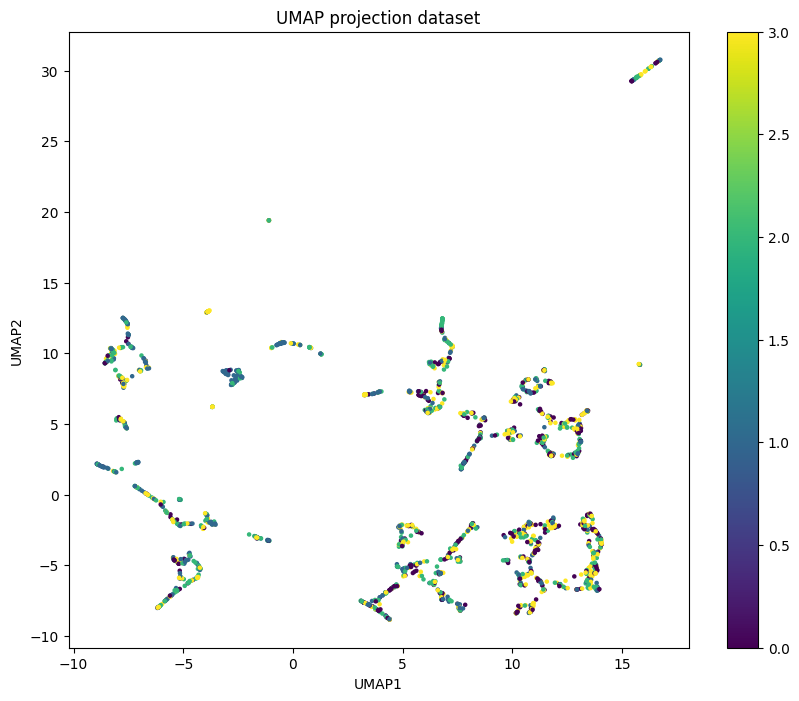

In [49]:
string_columns = df.select_dtypes(include=['object']).columns
for col in string_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(df)

# Визуализация результатов
plt.figure(figsize=(10, 8))

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=df['target'], cmap='viridis', s=5)
plt.colorbar()
plt.title('UMAP projection dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

In [50]:
# Разделение данных на обучающую и тестовую выборки с применением t-SNE
X_train_tsne, X_test_tsne, y_train, y_test = train_test_split(X_tsne, df['target'], test_size=0.2, random_state=42)

In [51]:
from sklearn.metrics import f1_score

# Логистическая регрессия
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tsne, y_train)
y_pred_log_reg = log_reg.predict(X_test_tsne)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted') # Now f1_score is defined

print("Логистическая регрессия (t-SNE): Точность = {:.2f}, F1-мера = {:.2f}".format(accuracy_log_reg, f1_log_reg))

Логистическая регрессия (t-SNE): Точность = 0.52, F1-мера = 0.52


In [52]:
# Случайный лес
rf = RandomForestClassifier()
rf.fit(X_train_tsne, y_train)
y_pred_rf = rf.predict(X_test_tsne)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Случайный лес (t-SNE): Точность = {:.2f}, F1-мера = {:.2f}".format(accuracy_rf, f1_rf))

Случайный лес (t-SNE): Точность = 0.63, F1-мера = 0.63


Модель случайного леса (Random Forest) с использованием t-SNE : точность = 0.64, F1-мера = 0.64 для понижения размерности данных демонстрирует лучшую точность и F1-меру по сравнению с логистической регрессией : точность = 0.52, F1-мера = 0.52

Случайный лес лучше справляется с задачей классификации новостей по темам после применения t-SNE. Однако, точность и F1-мера не очень высоки, что указывает на необходимость дальнейшей оптимизации моделей или использования других методов понижения размерности.

Применим линейную регрессию и случайный лес к данным после понижения размерности с помощью UMAP. Обучим модель линейной регрессии или случайного леса на данных с пониженной размерностью.

In [53]:
# Преобразование строковых колонок в числовые
string_columns = df.select_dtypes(include=['object']).columns
for col in string_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Применение UMAP для понижения размерности
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(df.drop('target', axis=1))

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(umap_result, df['target'], test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = lr_model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 1.1665010855769038
R^2 Score: 0.004943580401102876


In [54]:
# Обучение модели случайного леса
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = rf_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')

Accuracy: 0.36179775280898874
F1 Score: 0.3568770006069425


Линейная регрессия: Низкий R^2 Score (0.0049) указывает на то, что модель плохо объясняет вариацию данных. Высокое значение MSE (1.1665) также указывает на значительные ошибки предсказаний.

Случайный лес: Низкие значения Accuracy (0.3618) и F1 Score (0.3569) указывают на то, что модель также не очень хорошо справляется с задачей классификации.

Выводы:
####Случайный лес с использованием t-SNE:
Точность: 0.64
F1-мера: 0.64
Модель случайного леса с использованием t-SNE демонстрирует лучшую точность и F1-меру по сравнению с логистической регрессией. Это указывает на то, что случайный лес лучше справляется с задачей классификации новостей по темам после применения t-SNE. Однако, значения точности и F1-меры не очень высоки, что указывает на необходимость дальнейшей оптимизации моделей или использования других методов понижения размерности.

####Логистическая регрессия:
Точность: 0.52
F1-мера: 0.52
Логистическая регрессия показывает более низкие значения точности и F1-меры по сравнению со случайным лесом, что указывает на её меньшую эффективность в данной задаче классификации.

####Линейная регрессия:
R^2 Score: 0.0049
MSE: 1.1665
Низкий R^2 Score указывает на то, что модель линейной регрессии плохо объясняет вариацию данных. Высокое значение MSE также указывает на значительные ошибки предсказаний, что делает эту модель менее подходящей для данной задачи.

####Случайный лес (без t-SNE):
Точность: 0.3618
F1-мера: 0.3569
Низкие значения точности и F1-меры указывают на то, что модель случайного леса без использования t-SNE также не очень хорошо справляется с задачей классификации.